In [18]:
# pip install pandas
# pip install numpy

import pandas as pd
import numpy as np

file1_path = 'file1.csv'
file2_path = 'file2.csv'
file3_path = 'file3.csv'

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)
df3 = pd.read_csv(file3_path)


## 整合CSV

In [19]:
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()
df3.columns = df3.columns.str.strip()


In [20]:
# 'srno_2'列作為df1和df3的索引，确保它们是字符串類型
df1.set_index('srno_2', inplace=True)
df3.set_index('srno_2', inplace=True)

# 將'srno_2'和'yyyymm'作為df2的多重索引
df2.set_index(['srno_2', 'yyyymm'], inplace=True)


In [21]:
# 將df2的索引重置為ˊ列以便於合併
df2_reset = df2.reset_index()

# 基于srno_2合併df1的數據到df2
# 注意：實際操作需要根據實際數據結構調整
merged_df = pd.merge(df2_reset, df1, on='srno_2', how='left')

# 重複上述步驟將df3的數據合併到merged_df中
merged_df = pd.merge(merged_df, df3, on='srno_2', how='left', suffixes=('', '_df3'))


In [22]:
# 打印合併後DataFrame的欄位名稱
print(merged_df.columns)

# 打印合併後DataFrame的前五行數據
print(merged_df.head(20))


Index(['srno_2', 'yyyymm', 'aum01', 'aum02', 'aum03', 'aum04', 'aum05',
       'aum06', 'aum07', 'aum08', 'aum09', 'aum10', 'aum11', 'aum12',
       'bill_a1', 'bill_a2', 'bill_a3', 'bill_a4', 'bill_a5', 'bill_a6',
       'pmt_a01', 'pmt_a02', 'pmt_a03', 'pmt_a04', 'pmt_a05', 'pmt_a06',
       'pmt_a07', 'pmt_a08', 'pmt_a09', 'pmt_a10', 'pmt_a11', 'pmt_a12',
       'pmt_a13', 'pmt_a14', 'pmt_a15', 'pmt_a16', 'pmt_a17', 'pmt_a18',
       'pmt_c01', 'pmt_c02', 'pmt_c03', 'pmt_c04', 'pmt_c05', 'pmt_c06',
       'pmt_c07', 'pmt_c08', 'pmt_c09', 'pmt_c10', 'pmt_c11', 'pmt_c12',
       'pmt_c13', 'pmt_c14', 'pmt_c15', 'pmt_c16', 'pmt_c17', 'pmt_c18',
       'dep_a1', 'dep_a2', 'dep_a3', 'dep_a4', 'dep_c1', 'dep_c2', 'dep_c3',
       'dep_c4', 'AMT_Exchange_A', 'AMT_Exchange_B', 'CNT_Exchange_A',
       'CNT_Exchange_B', 'YN_Web_Active', 'YN_secur', 'CNT_WBMB_Login',
       'YN_SLR', 'INV_ADV', 'rs_prod_1', 'rs_prod_2', 'rs_prod_3', 'gender',
       'age', 'edu', 'mry', 'job', 'occp', 'zip', 

## 刪除變數 + 轉換Y,N to 1,0

In [23]:
# 假設 merged_df 是最終合併的 DataFrame

# 刪除不必要的變數
merged_df.drop(['rs_prod_1_df3', 'rs_prod_2_df3','rs_prod_1','rs_prod_2'], axis=1, inplace=True)

# 接下來數據分割和模型訓練等後續步驟


+ 資料裡面只有Y跟0 : 

    + intr_13 行為/互動標籤_類別13   

    + intr_12 行為/互動標籤_類別12
    
    

+ 資料裡面只有Y跟空白：
    
    + YN_Web_Active 數位會員活躍度標籤
       
    + YN_secur 證券戶標籤
    
    + YN_SLR 是否為薪轉戶
    
    


In [27]:
# 假設df是您的DataFrame

# 將'Y'轉換成1，將'0'和空白轉換成0
# 先去除列中值的前後空格

merged_df['intr_12'] = merged_df['intr_12'].str.strip().replace({'Y': 1, '0': 0}).fillna(0).astype(int)
merged_df['intr_13'] = merged_df['intr_13'].str.strip().replace({'Y': 1, '0': 0}).fillna(0).astype(int)
merged_df['YN_Web_Active'] = merged_df['YN_Web_Active'].str.strip().replace({'Y': 1}).fillna(0).astype(int)
merged_df['YN_secur'] = merged_df['YN_secur'].str.strip().replace({'Y': 1}).fillna(0).astype(int)
merged_df['YN_SLR'] = merged_df['YN_SLR'].str.strip().replace({'Y': 1}).fillna(0).astype(int)

# 現在每個指定的列都應該只包含整數1和0
print(merged_df[['intr_12','intr_13', 'YN_Web_Active', 'YN_secur', 'YN_SLR']])


C:\Users\User\AppData\Local\Temp\ipykernel_16576\732219706.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['intr_12'] = merged_df['intr_12'].str.strip().replace({'Y': 1, '0': 0}).fillna(0).astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_16576\732219706.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['intr_13'] = merged_df['intr_13'].str.strip().replace({'Y': 1, '0': 0}).fillna(0).astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_16576\732219706.py:8: FutureWarning: Downcasting behavior in `r

         intr_12  intr_13  YN_Web_Active  YN_secur  YN_SLR
0              0        1              0         0       0
1              0        1              0         0       0
2              0        1              0         0       0
3              0        1              0         0       0
4              0        1              0         0       0
...          ...      ...            ...       ...     ...
2399995        1        0              1         0       1
2399996        1        0              1         0       1
2399997        1        0              1         0       1
2399998        1        0              1         0       1
2399999        1        0              1         0       1

[2400000 rows x 5 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_16576\732219706.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['YN_SLR'] = merged_df['YN_SLR'].str.strip().replace({'Y': 1}).fillna(0).astype(int)


In [28]:
# 匯出成csv
merged_df.to_csv('merged_df.csv', index=False)


In [7]:
# 看唯一值
import pandas as pd
merged_df = pd.read_csv('merged_df.csv')
unique_values = merged_df['intr_12'].unique()
print(unique_values)

[0 1]


In [16]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 95 columns):
 #   Column          Dtype  
---  ------          -----  
 0   srno_2          int64  
 1   yyyymm          int64  
 2   aum01           int64  
 3   aum02           int64  
 4   aum03           int64  
 5   aum04           int64  
 6   aum05           int64  
 7   aum06           int64  
 8   aum07           int64  
 9   aum08           int64  
 10  aum09           int64  
 11  aum10           int64  
 12  aum11           int64  
 13  aum12           int64  
 14  bill_a1         int64  
 15  bill_a2         int64  
 16  bill_a3         int64  
 17  bill_a4         int64  
 18  bill_a5         int64  
 19  bill_a6         int64  
 20  pmt_a01         int64  
 21  pmt_a02         int64  
 22  pmt_a03         int64  
 23  pmt_a04         int64  
 24  pmt_a05         int64  
 25  pmt_a06         int64  
 26  pmt_a07         int64  
 27  pmt_a08         int64  
 28  pmt_a09     

+ rs_prod   這個人每個月有沒有買

    + rs_prod_df3 這個人有沒有買

## 隨機森林分析

In [8]:
# pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

merged_df = pd.read_csv('merged_df.csv')

# 分離特徵和目標變數
X = merged_df.drop(['rs_prod_3_df3'], axis=1)  # 特徵集
y = merged_df['rs_prod_3_df3']  # 目標變數

# 劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化隨機森林回歸模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 訓練模型
rf_model.fit(X_train, y_train)

# 進行預測
predictions = rf_model.predict(X_test)

# 評估模型
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


Mean Absolute Error: 0.016979145833333337
Mean Squared Error: 0.005343226874999999


## 比對圖 (train vs test)

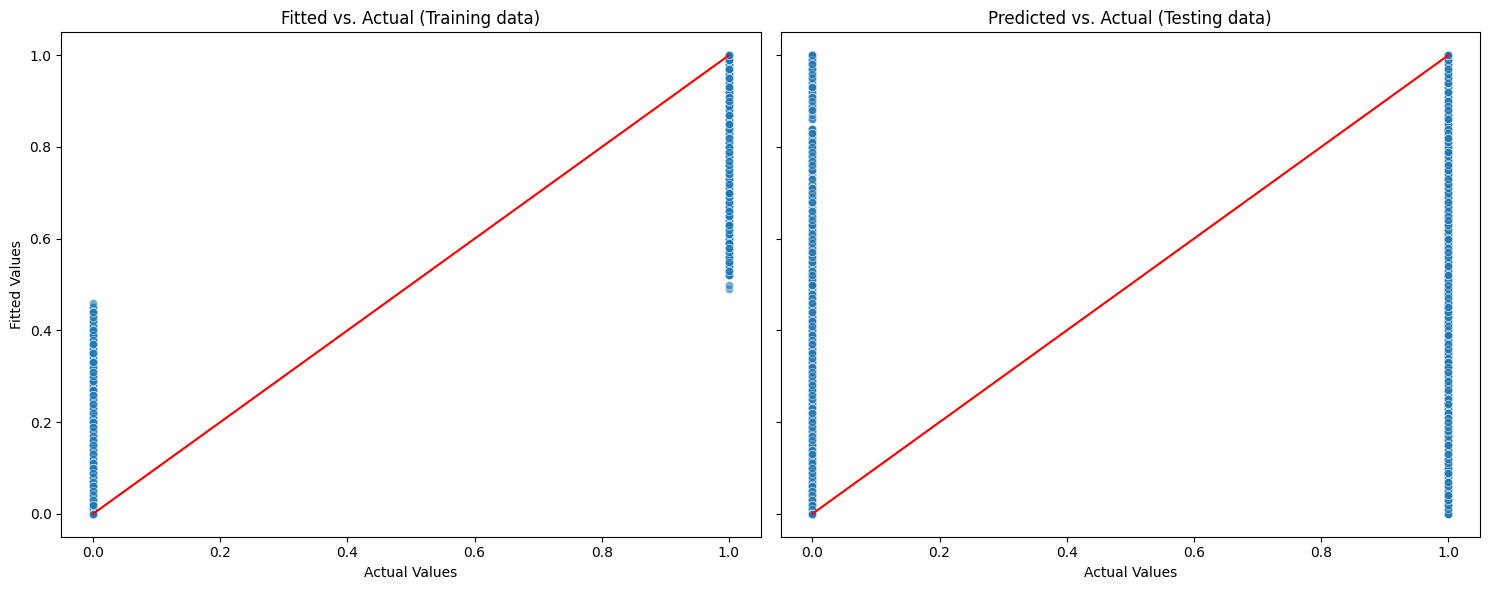

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your model is named as 'rf_model'
# Train predictions
train_predictions = rf_model.predict(X_train)

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# First plot (Fitted results on training data)
sns.scatterplot(ax=axes[0], x=y_train, y=train_predictions, alpha=0.6)
sns.lineplot(ax=axes[0], x=y_train, y=y_train, color='red')  # Ideal line
axes[0].set_title('Fitted vs. Actual (Training data)')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Fitted Values')

# Second plot (Prediction results on testing data)
sns.scatterplot(ax=axes[1], x=y_test, y=predictions, alpha=0.6)
sns.lineplot(ax=axes[1], x=y_test, y=y_test, color='red')  # Ideal line
axes[1].set_title('Predicted vs. Actual (Testing data)')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')

# Display the plot
plt.tight_layout()
plt.show()


## XGBOOST & CATBOOST

In [22]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Boston Housing dataset
boston = fetch_openml(name='boston')
X, y = boston.data, boston.target

# Split the first 80% of data as the training dataset
train_size = int(0.8 * X.shape[0])
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)

# CatBoost model
cat_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, verbose=False)
cat_model.fit(X_train, y_train)

# LightGBM model (using Iris dataset for classification)
iris = fetch_openml(name='iris')
X_iris, y_iris = iris.data, iris.target
X_iris_train, X_iris_test = X_iris[:train_size], X_iris[train_size:]
y_iris_train, y_iris_test = y_iris[:train_size], y_iris[train_size:]

# Install lightgbm if not already installed (Uncomment the next line)
# !pip install lightgbm

# Convert target to numeric for model compatibility
y_iris_train = y_iris_train.astype('category').cat.codes
y_iris_test = y_iris_test.astype('category').cat.codes

# LightGBM model
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
lgbm_model.fit(X_iris_train, y_iris_train)

# Performance metrics
iris_predictions = lgbm_model.predict(X_iris_test)
accuracy = accuracy_score(y_iris_test, iris_predictions)
precision = precision_score(y_iris_test, iris_predictions, average='macro')
recall = recall_score(y_iris_test, iris_predictions, average='macro')
f1 = f1_score(y_iris_test, iris_predictions, average='macro')

(xgb_model, cat_model, lgbm_model, accuracy, precision, recall, f1)


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:109: UserWarning: A network error occurred while downloading https://api.openml.org/api/v1/json/data/list/data_name/boston/limit/2/status/active/. Retrying...
  warn(


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>